# Configuration

In [113]:
import pandas as pd
pd.set_option('display.max_columns', None)
import os
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def plot_cases_by_type(df, case_type):
    """
    Plots a stacked bar graph of case counts per year, separated into the specified case type and all other types.
    Parameters:
    - df: DataFrame containing case data.
    - case_type: String specifying the type of cases to separate out.
    The DataFrame is expected to have a 'new_date_filed' column with datetime objects and a 'type' column with case types.
    """
    # Filter the DataFrame for the specified case type and for all other types
    df_specified_type = df[df['type'] == case_type]
    df_not_specified_type = df[df['type'] != case_type]

    # Count cases per year for both filters
    cases_per_year_specified = df_specified_type['new_date_filed'].dt.year.value_counts().sort_index()
    cases_per_year_not_specified = df_not_specified_type['new_date_filed'].dt.year.value_counts().sort_index()

    # Combine into a single DataFrame and fill missing values
    years_combined = pd.DataFrame({
        case_type: cases_per_year_specified,
        'Not ' + case_type: cases_per_year_not_specified
    }).fillna(0)  # Fill missing values with 0 for years with no cases

    # Convert the index to integer to remove the '.0'
    years_combined.index = years_combined.index.astype(int)

    # Plotting
    plt.figure(figsize=(12, 8))
    years_combined.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
    plt.title(f'Number of Cases per Year: {case_type} vs. Other Types')
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.legend(title='Case Type')
    plt.tight_layout()

    # Show the plot
    plt.show()


In [115]:
df_elections_NxGen = pd.read_pickle(r"C:\Users\PsyLab-9221\Documents\DIWA\files_for_merge\election_files\NxGen_election_grouped.pkl")
df_elections_CATS = pd.read_pickle(r"C:\Users\PsyLab-9221\Documents\DIWA\files_for_merge\election_files\CATS_election_grouped.pkl")
df_elections_CHIPS = pd.read_pickle(r"C:\Users\PsyLab-9221\Documents\DIWA\files_for_merge\election_files\chips_election_grouped.pkl")
df_elections_Cornell = pd.read_pickle(r"C:\Users\PsyLab-9221\Documents\DIWA\files_for_merge\election_files\cornell_election_grouped.pkl")
df_elections_Cornell_full = pd.read_pickle(r"C:\Users\PsyLab-9221\Documents\DIWA\files_for_merge\cornell_full\cornell_election_grouped_full.pkl")
df_R_CASE_Cornell = pd.read_pickle(r"C:\Users\PsyLab-9221\Documents\DIWA\files_for_merge\case_files\cornell_r_case_grouped.pkl")

In [116]:
# Function to standardize case number
def standardize_case_number(case_number):
    parts = case_number.split('-')
    # Ensure the first part has two digits
    parts[0] = parts[0].zfill(2)
    # Ensure the docket number (last part) has six digits
    parts[-1] = parts[-1].zfill(6)
    # Rejoin the parts into a standardized case number
    return '-'.join(parts)


In [117]:
df_elections_NxGen['Case Number'] = df_elections_NxGen['Case Number'].apply(standardize_case_number)
df_elections_CATS['r_case_number'] = df_elections_CATS['r_case_number'].apply(standardize_case_number)
df_elections_CHIPS['case_number'] = df_elections_CHIPS['case_number'].apply(standardize_case_number)
df_elections_Cornell['case_number'] = df_elections_Cornell['case_number'].apply(standardize_case_number)
df_R_CASE_Cornell['case_number'] = df_R_CASE_Cornell['case_number'].apply(standardize_case_number)

In [119]:
# Merge the dataframes on 'case_number' with a left join to keep all entries from df_elections_Cornell.
df_elections_Cornell= pd.merge(df_elections_Cornell, df_R_CASE_Cornell[['case_number', 'date_filed']], on='case_number', how='left', suffixes=('', '_from_R'))

# This will ensure df_merged has the same number of rows as df_elections_Cornell, with additional data filled in where matches are found.




In [121]:
# Fill the NaT values in 'new_date_filed' with 'date_filed' from df_R_CASE_Cornell
df_elections_Cornell['new_date_filed'] = df_elections_Cornell.apply(
    lambda row: row['date_filed_from_R'] if pd.isna(row['new_date_filed']) else row['new_date_filed'],
    axis=1
)

In [122]:
# Optionally, if you do not need the 'date_filed_from_R' column anymore, you can drop it
df_elections_Cornell.drop(columns=['date_filed_from_R'], inplace=True)

In [123]:
j = 0
for i in df_elections_Cornell['new_date_filed']:
    if pd.isna(i):
        j += 1

In [124]:
Varialbes_for_final_table = ['data_source', 'case_number', 'union', 'new_date_filed', 'new_date_election', 'new_date_closed', 'num_elig_employees', 'num_valid_votes', 
 'num_votes_for', 'num_votes_against', 'election_results', 'employer', 'petitioner', 'city', 'employer_address_1', 'employer_address_2', 'employer_state', 'union_representation', 'Days_Filed_to_Closed', 'Days_Filed_to_Election' ]

In [125]:
Varialbes_for_final_table2 = ['data_source', 'case_number', 'type', 'union', 'new_date_filed', 'new_date_election', 'new_date_closed', 'election_results_final', 'employer', 'petitioner', 'mean_union_representation', 'Days_Filed_to_Closed', 'Days_Filed_to_Election' ]

# CHIPS Data

## Creating CHIPS Dataset

In [126]:
df_elections_CHIPS['data_source'] = 'CHIPS'

In [127]:
df_elections_CHIPS['case name'] = df_elections_CHIPS['employer']
df_elections_CHIPS['petitioner'] = df_elections_CHIPS['nunion']
df_elections_CHIPS['employer_address_2'] = None
df_elections_CHIPS['employer_state'] = None

In [128]:
df_elections_CHIPS.rename(columns = {'nevoters':'num_elig_employees',
                                     'largest_for_votes':'num_votes_for',
                                     'validv':'num_valid_votes',
                                     'street':'employer_address_1',
                                     'full_date_closed':'date_closed',
                                     'ehd_datetime':'date_election',
                                     'datefied_datetime':'date_filed',
                                     'voyesau':'num_votes_against',
                                     'nunion':'union',
                                     }, inplace = True) 


In [129]:
df_elections_CHIPS.head(1)

,case_number,type,employer,union,new_date_filed,new_date_election,new_date_closed,election_results_final,union_representation,Days_Filed_to_Closed,Days_Filed_to_Election,mean_union_representation,data_source,case name,petitioner,employer_address_2,employer_state
0,01-RC-015889,RC,ALDEN SUPPLY & MFG CO,GARMENT WKRS UNITED,1978-08-10,1978-11-15,1985-01-30,LOST,0.386364,2365.0,97.0,0.386364,CHIPS,ALDEN SUPPLY & MFG CO,GARMENT WKRS UNITED,None,None


In [130]:
df_elections_CHIPS = df_elections_CHIPS[Varialbes_for_final_table2]

In [131]:
df_elections_CHIPS

,data_source,case_number,type,union,new_date_filed,new_date_election,new_date_closed,election_results_final,employer,petitioner,mean_union_representation,Days_Filed_to_Closed,Days_Filed_to_Election
0,CHIPS,01-RC-015889,RC,GARMENT WKRS UNITED,1978-08-10,1978-11-15,1985-01-30,LOST,ALDEN SUPPLY & MFG CO,GARMENT WKRS UNITED,0.386364,2365.0,97.0
1,CHIPS,01-RC-017183,RC,PLUMBERS,1981-02-01,1981-06-12,1984-07-10,WON,GERBER CO,PLUMBERS,0.521739,1255.0,131.0
2,CHIPS,01-RC-017476,RC,RETAIL & WHOLESALE EMPLS,1981-10-16,1982-02-04,1985-07-11,LOST,SPRINGFIELD HOSPITAL,RETAIL & WHOLESALE EMPLS,NaN,1364.0,111.0
3,CHIPS,01-RC-017480,RC,PLUMBERS,1981-10-22,NaT,NaT,WON,CABCO ENGINEERING CO,PLUMBERS,0.500000,NaN,NaN
4,CHIPS,01-RC-017569,RC,ELECTRICAL WKRS IBEW,1982-02-18,1984-01-26,1984-02-06,LOST,"THREE-E CO, INC",ELECTRICAL WKRS IBEW,0.140000,718.0,707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60608,CHIPS,09-RM-000971,RM,MACHINISTS,1988-12-02,1989-01-13,1989-01-23,LOST,"CALDWELL TANKS, INC.",MACHINISTS,0.333333,52.0,42.0
60609,CHIPS,09-RM-000977,RM,MACHINISTS,1989-11-09,1990-04-27,1990-05-07,LOST,BODE-FINN CO.,MACHINISTS,0.500000,179.0,169.0
60610,CHIPS,09-RM-000983,RM,PAPERWORKERS,1990-08-28,1990-09-28,1990-10-09,LOST,BOX & PARTITION CO.,PAPERWORKERS,0.291667,42.0,31.0
60611,CHIPS,09-RM-000987,RM,STEEL WKRS,1990-11-13,1990-12-14,1990-12-24,WON,DOEMAN PRODUCTS,STEEL WKRS,NaN,41.0,31.0


## CHIPS Graph

<Figure size 1200x800 with 0 Axes>

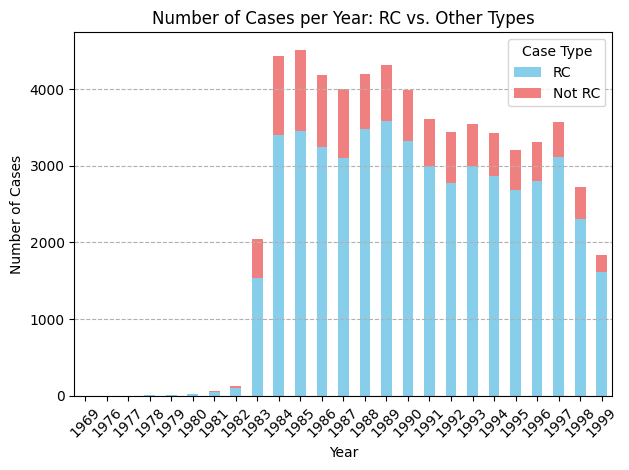

In [132]:
plot_cases_by_type(df_elections_CHIPS, 'RC')

# CATS Data

## Creating CATS Dataset

In [133]:
df_elections_CATS['data_source'] = 'CATS'
df_elections_CATS['employer'] = df_elections_CATS['case_name']

In [134]:
df_elections_CATS.rename(columns = {'employer_city':'city',
                                    'r_case_number':'case_number',
                                    'union_involved':'union',
                                    'r_case_number': 'case_number'
                                     }, inplace = True) 

In [135]:
df_elections_CATS = df_elections_CATS[Varialbes_for_final_table2]

In [136]:
# df_elections_CATS.to_excel('df_elections_CATS.xlsx')

In [137]:
# df = df_elections_CATS

## CATS Graph

<Figure size 1200x800 with 0 Axes>

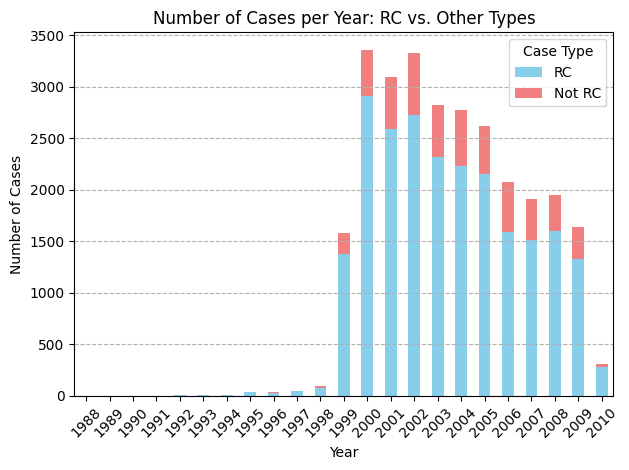

In [138]:
plot_cases_by_type(df_elections_CATS, 'RC')

In [139]:
df_elections_CATS

,data_source,case_number,type,union,new_date_filed,new_date_election,new_date_closed,election_results_final,employer,petitioner,mean_union_representation,Days_Filed_to_Closed,Days_Filed_to_Election
0,CATS,01-RC-020467,RC,,1996-05-28,1996-07-11,2001-01-10,WIN,"Ionics, Inc.",Teamsters Local Union 404,0.111111,1688.0,44.0
1,CATS,01-RC-020508,RC,,1996-09-16,1996-12-06,1999-10-28,LOSS,"A. Russo & Sons, Inc.",Teamsters Local 829,0.208955,1137.0,81.0
2,CATS,01-RC-020761,RC,,1998-01-30,2001-01-26,2001-03-01,LOSS,Coventry Health Center,International Brotherhood of Teamsters Local 64,0.333333,1126.0,1092.0
3,CATS,01-RC-020804,RC,Plumbers and Gasfitters Local 12,1998-03-19,1998-06-29,1999-11-17,WIN,Tradesource Staffing,Plumbers and Gasfitters Local 12,0.500000,608.0,102.0
4,CATS,01-RC-020815,RC,,1998-04-02,2001-01-26,2001-03-23,LOSS,"Coventry Continum, Inc. d/b/a",Teamsters Local Union 64,0.350000,1086.0,1030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27680,CATS,37-UD-000095,UD,Laborers' International Union of North America...,2000-04-03,2000-05-25,2000-06-09,LOSS,Lenox Healthcare L.P. dba Keau,An Individual,0.322581,67.0,52.0
27681,CATS,37-UD-000097,UD,"ILWU, Local 142, AFL-CIO",2001-09-19,2001-11-29,2001-12-07,LOSS,Diamond Resort Hawaii Corporat,An Individual,0.606061,79.0,71.0
27682,CATS,37-UD-000098,UD,"Operating Engineers Local 3, AFL-CIO",2002-05-09,2002-06-19,2002-06-27,WIN,"Kona Transportation Co., Inc.",An Individual,0.666667,49.0,41.0
27683,CATS,37-UD-000099,UD,"United Public Workers, Local 646",2003-05-29,2003-07-22,2003-07-30,LOSS,Waste Management,An Individual,0.222222,62.0,54.0


# NxGen Data

## Creating NxGen Dataset

In [140]:
# Create a new column 'Union with Most Votes' to contain the name of the union with the largest number of votes
# Initialize the column with None to fill in values based on logic
df_elections_NxGen['Union with Most Votes'] = None

# Iterate through each row to determine the union with the most votes
for index, row in df_elections_NxGen.iterrows():
    # Extract votes and union names, considering missing values as 0 votes
    votes = [row['Votes for Labor Union1'] or 0, row['Votes for Labor Union2'] or 0, row['Votes for Labor Union3'] or 0]
    unions = [row['Labor Union1'], row['Labor Union2'], row['Labor Union3']]
    
    # Determine the index of the union with the highest votes
    max_votes_index = votes.index(max(votes))
    
    # Assign the name of the union with the most votes to the new column, if any votes are present
    if max(votes) > 0: # This ensures we're only considering cases where there are votes
        df_elections_NxGen.at[index, 'Union with Most Votes'] = unions[max_votes_index]

In [141]:
df_elections_NxGen['data_source'] = 'NxGen'
df_elections_NxGen['employer'] = df_elections_NxGen['Case Name']
df_elections_NxGen['petitioner'] = df_elections_NxGen['Union with Most Votes']
df_elections_NxGen['employer_address_1'] = None
df_elections_NxGen['employer_address_2'] = None

In [142]:
df_elections_NxGen.rename(columns = {'Case Number':'case_number',
                                    'Union with Most Votes':'union',
                                    'Date Filed':'date_filed',
                                    'New Date Filed':'new_date_filed',
                                    'Tally Date':'date_election',
                                    'New Date Election':'new_date_election',
                                    'Date Closed':'date_closed',
                                    'New Date Closed':'new_date_closed',
                                    'No of Eligible Voters':'num_elig_employees',
                                    'Total Ballots Counted':'num_valid_votes',
                                    'Max Votes for Union (Updated)':'num_votes_for',
                                    'Votes Against (Updated)':'num_votes_against',
                                    'Unionization Outcome (Updated)':'election_results_final',
                                    'City':'city',
                                    'States & Territories':'employer_state'
                                     }, inplace = True) 

In [143]:
df_elections_NxGen = df_elections_NxGen[Varialbes_for_final_table2]

## NxGen Graph

<Figure size 1200x800 with 0 Axes>

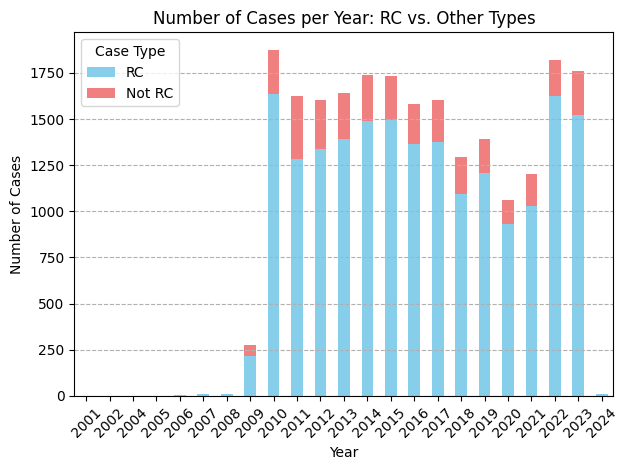

In [144]:
plot_cases_by_type(df_elections_NxGen, 'RC')

In [145]:
df_elections_NxGen

,data_source,case_number,type,union,new_date_filed,new_date_election,new_date_closed,election_results_final,employer,petitioner,mean_union_representation,Days_Filed_to_Closed,Days_Filed_to_Election
0,NxGen,01-RC-022162,RC,INTERNATIONAL ALLIANCE OF THEATRICAL STAGE EMP...,2007-12-04,2010-07-18,2010-07-28,WIN,Live Nation d/b/a DLC/Tea Party Concerts,INTERNATIONAL ALLIANCE OF THEATRICAL STAGE EMP...,0.460317,967.0,957
1,NxGen,01-RC-022330,RC,"AMALGAMATED TRANSIT UNION, LOCAL 1548, AFL-CIO",2009-05-22,2010-05-07,2010-05-17,LOSS,"Jay's Equipment Repair, Inc. d/b/a Cape Desti...","AMALGAMATED TRANSIT UNION, LOCAL 1548, AFL-CIO",0.160000,360.0,350
2,NxGen,01-RC-022338,RC,"BOSTON MUSICIANS ASSOCIATION, A/W AMERICAN FED...",2009-06-12,2012-01-13,2012-01-24,LOSS,Cape Cod Symphony Orchestra,"BOSTON MUSICIANS ASSOCIATION, A/W AMERICAN FED...",0.380000,956.0,945
3,NxGen,01-RC-022381,RC,"AMERICAN FEDERATION OF TEACHERS MASSACHUSETTS,...",2009-10-28,2010-01-20,2010-02-01,WIN,Longy School of Music,"AMERICAN FEDERATION OF TEACHERS MASSACHUSETTS,...",0.573034,96.0,84
4,NxGen,01-RC-022388,RC,"INTERNATIONAL UNION, SECURITY, POLICE AND FIRE...",2009-11-13,2010-01-05,2010-01-11,WIN,Chenega Security Protective Services,"INTERNATIONAL UNION, SECURITY, POLICE AND FIRE...",0.531250,59.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22253,NxGen,37-RC-004237,RC,None,2011-04-29,2011-06-10,2011-06-20,WIN,"Hyatt Corporation, As Agent of CCHH Maui, LLC ...",None,0.763158,52.0,42
22254,NxGen,37-RD-000429,RD,INTERNATIONAL ASSOCATION OF MACHINISTS AND AER...,2010-02-02,2010-05-20,2010-06-01,WIN,BAE Systems,INTERNATIONAL ASSOCATION OF MACHINISTS AND AER...,0.651613,119.0,107
22255,NxGen,37-RD-000430,RD,"INTERNATIONAL LONGSHORE AND WAREHOUSE UNION, L...",2010-04-09,2010-05-21,2010-06-01,LOSS,Pepsi Bottling Group,"INTERNATIONAL LONGSHORE AND WAREHOUSE UNION, L...",0.250000,53.0,42
22256,NxGen,37-RD-000431,RD,"INTERNATIONAL LONGSHORE AND WAREHOUSE UNION, L...",2010-05-17,2010-07-26,2010-08-03,LOSS,Castle & Cooke/Dole Plantation,"INTERNATIONAL LONGSHORE AND WAREHOUSE UNION, L...",0.346154,78.0,70


# Cornell Data

## Creating Cornell Dataset

In [146]:
df_elections_Cornell.head()

,case_number,region,type,number,date_filed,industry,state,unit,unit_size,election_date,election_type,num_elig_emplyees,num_votes_for_winner,winning_union_code,num_votes_loser_1,code_union_loser_1,num_votes_loser_2,code_union_loser_2,num_votes_against,num_challenged_ballots,elections_cases_control,objection_filed_date,party_filing_objections,days_election_to_objections,rulling,days_decision_to_election,request_for_review,election_control,before_or_after_hearing_control,date_case_close,days_election_to_closing,stage,method_of_disposition,union_participation,incumbent_unit,record_control,date_filed_parsed,election_date_parsed,date_case_close_parsed,largest_for_votes,outcome,new_date_filed,new_date_election,new_date_closed,election_results_final,union_representation,Days_Filed_to_Closed,Days_Filed_to_Election,mean_union_representation
0,01-RC-011913,1,RC,11913,172,509,MAS,T,1,872,S,8,0,8000,3,3233,0,0000,5,00,1,000,0.0,00,0.0,00,0.0,1,F,972,&8,1,4,B,None,6,1972-01-01,1972-08-01,1972-09-01,3,LOSS,1972-01-01,1972-08-01,1972-09-01,LOSS,0.375000,244.0,213.0,0.375000
1,01-RC-011915,1,RC,11915,172,483,MAS,P,2,472,R,15,6,1061,0,0000,0,0000,4,00,1,000,0.0,00,0.0,03,2.0,1,N,872,12,7,3,A,None,6,1972-01-01,1972-04-01,1972-08-01,6,WIN,1972-01-01,1972-04-01,1972-08-01,WIN,0.400000,213.0,91.0,0.400000
2,01-RC-011966,1,RC,11966,272,201,MAS,A,5,872,S,113,60,1146,0,0000,0,0000,33,14,1,000,0.0,00,0.0,00,0.0,1,F,872,&8,1,3,A,None,6,1972-02-01,1972-08-01,1972-08-01,60,WIN,1972-02-01,1972-08-01,1972-08-01,WIN,0.530973,182.0,182.0,0.530973
3,01-RC-011990,1,RC,11990,272,769,MAS,P,3,872,R,29,0,8000,12,3233,0,0000,16,00,1,000,0.0,00,0.0,11,2.0,1,N,872,&7,7,4,B,None,6,1972-02-01,1972-08-01,1972-08-01,12,LOSS,1972-02-01,1972-08-01,1972-08-01,LOSS,0.413793,182.0,182.0,0.413793
4,01-RC-012004,1,RC,12004,372,262,RI,A,1,472,C,9,0,8000,4,1172,0,0000,4,00,1,000,0.0,00,0.0,00,0.0,1,E,273,21,1,4,A,None,6,1972-03-01,1972-04-01,1973-02-01,4,None,1972-03-01,1972-04-01,1973-02-01,None,0.444444,337.0,31.0,0.444444


In [147]:
df_elections_Cornell['data_source'] = 'Cornell'
df_elections_Cornell['union'] = None
df_elections_Cornell['employer'] = None
df_elections_Cornell['petitioner'] = None

In [148]:
df_elections_Cornell = df_elections_Cornell[Varialbes_for_final_table2]

In [149]:
df_elections_Cornell 

,data_source,case_number,type,union,new_date_filed,new_date_election,new_date_closed,election_results_final,employer,petitioner,mean_union_representation,Days_Filed_to_Closed,Days_Filed_to_Election
0,Cornell,01-RC-011913,RC,None,1972-01-01,1972-08-01,1972-09-01,LOSS,None,None,0.375000,244.0,213.0
1,Cornell,01-RC-011915,RC,None,1972-01-01,1972-04-01,1972-08-01,WIN,None,None,0.400000,213.0,91.0
2,Cornell,01-RC-011966,RC,None,1972-02-01,1972-08-01,1972-08-01,WIN,None,None,0.530973,182.0,182.0
3,Cornell,01-RC-011990,RC,None,1972-02-01,1972-08-01,1972-08-01,LOSS,None,None,0.413793,182.0,182.0
4,Cornell,01-RC-012004,RC,None,1972-03-01,1972-04-01,1973-02-01,None,None,None,0.444444,337.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89866,Cornell,09-RM-000902,RM,None,1984-02-01,1984-03-01,1984-03-01,LOSS,None,None,0.407407,29.0,29.0
89867,Cornell,09-RM-000904,RM,None,1984-04-01,1984-06-01,1984-06-01,LOSS,None,None,0.000000,61.0,61.0
89868,Cornell,09-RM-000908,RM,None,1984-10-01,1984-11-01,1984-11-01,WIN,None,None,0.800000,31.0,31.0
89869,Cornell,09-RM-000909,RM,None,1984-10-01,1984-11-01,1984-12-01,WIN,None,None,0.827586,61.0,31.0


## Cornell Graph

<Figure size 1200x800 with 0 Axes>

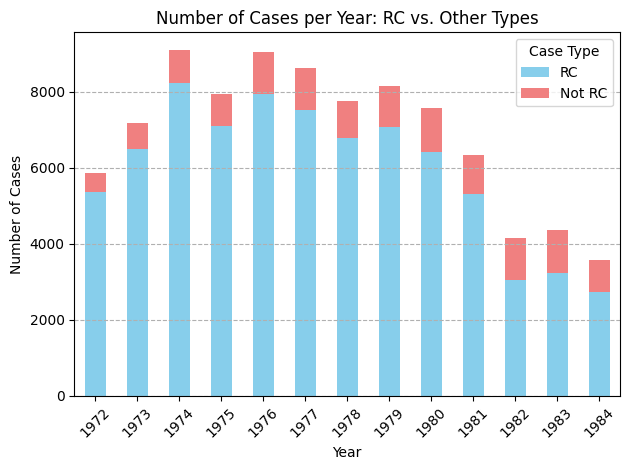

In [150]:
plot_cases_by_type(df_elections_Cornell, 'RC')

# Cornell_full

In [151]:
df_elections_Cornell_full.head()

,case_number,region,type,number,date_filed,industry,state,unit,unit_size,election_date,election_type,num_elig_emplyees,num_votes_for_winner,winning_union_code,num_votes_loser_1,code_union_loser_1,num_votes_loser_2,code_union_loser_2,num_votes_against,num_challenged_ballots,elections_cases_control,objection_filed_date,party_filing_objections,days_election_to_objections,rulling,days_decision_to_election,request_for_review,election_control,before_or_after_hearing_control,date_case_close,days_election_to_closing,stage,method_of_disposition,union_participation,incumbent_unit,record_control,date_filed_parsed,election_date_parsed,date_case_close_parsed,largest_for_votes,outcome,new_date_filed,new_date_election,new_date_closed,election_results_final,union_representation,Days_Filed_to_Closed,Days_Filed_to_Election,mean_union_representation
0,1-RC-10190,1,RC,10190,871,509,CON,T,2,772,B,19,0,8000,7,3233,0,0000,12,00,1,000,0.0,00,0.0,03,5.0,1,P,772,&0,7,4,B,5,6,1971-08-01,1972-07-01,1972-07-01,7,LOSS,1971-08-01,1972-07-01,1972-07-01,LOSS,0.368421,335.0,335.0,0.368421
1,1-RC-11417,1,RC,11417,271,531,MAS,A,5,972,R,191,0,8000,50,1036,0,0000,106,27,1,000,0.0,00,0.0,43,2.0,5,N,972,&0,7,4,A,None,6,1971-02-01,1972-09-01,1972-09-01,50,LOSS,1971-02-01,1972-09-01,1972-09-01,LOSS,0.261780,578.0,578.0,0.261780
2,1-RC-11587,1,RC,11587,571,809,MAS,Z,4,671,S,43,0,8000,11,1451,0,0000,24,05,1,671,2.0,&6,3.0,00,0.0,1,C,872,38,1,4,A,None,6,1971-05-01,1971-06-01,1972-08-01,11,LOSS,1971-05-01,1971-06-01,1972-08-01,LOSS,0.255814,458.0,31.0,0.255814
3,1-RC-11623,1,RC,11623,671,399,MAS,A,4,072,R,90,0,8000,29,1036,0,0000,51,05,1,000,0.0,00,0.0,03,1.0,1,N,273,&8,7,4,A,None,6,1971-06-01,1972-10-01,1973-02-01,29,LOSS,1971-06-01,1972-10-01,1973-02-01,LOSS,0.322222,611.0,488.0,0.322222
4,1-RC-11692,1,RC,11692,871,581,MAS,A,4,672,R,96,34,1105,0,0000,0,0000,20,00,1,672,1.0,&9,2.0,28,2.0,5,N,872,05,7,3,A,None,6,1971-08-01,1972-06-01,1972-08-01,34,WIN,1971-08-01,1972-06-01,1972-08-01,WIN,0.354167,366.0,305.0,0.354167


In [152]:
df_elections_Cornell_full['data_source'] = 'Cornell'
df_elections_Cornell_full['union'] = None
df_elections_Cornell_full['employer'] = None
df_elections_Cornell_full['petitioner'] = None

In [153]:
df_elections_Cornell_full = df_elections_Cornell_full[Varialbes_for_final_table2]

<Figure size 1200x800 with 0 Axes>

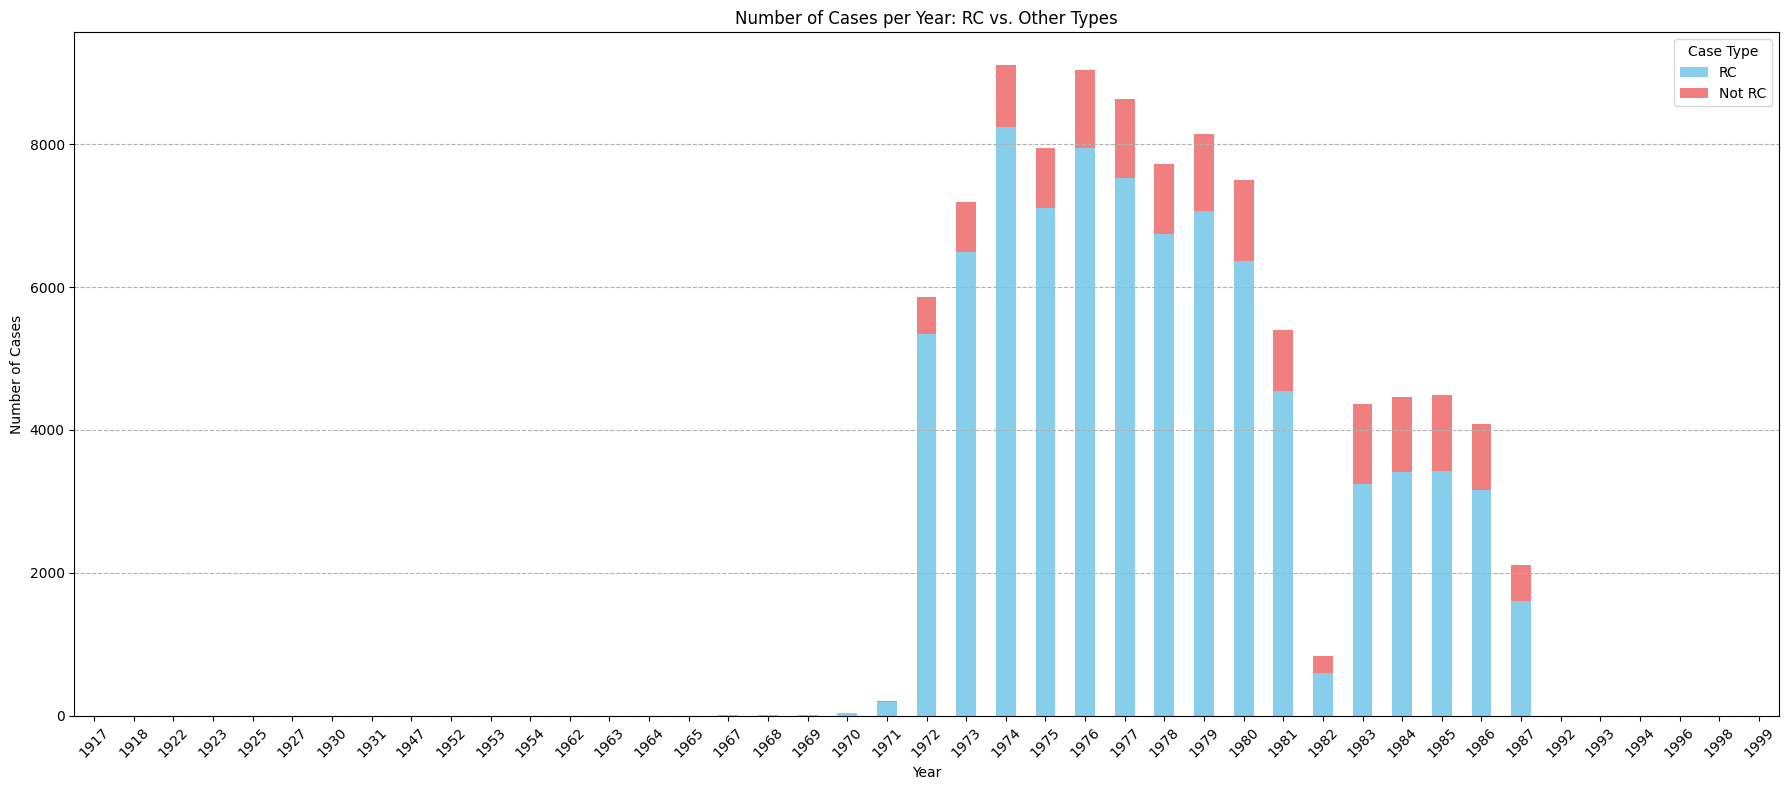

In [171]:
plot_cases_by_type(df_elections_Cornell_full, 'RC')

# Concatenating files

## Concat files

In [155]:
df_elections_concat = pd.concat([df_elections_CHIPS,df_elections_CATS,df_elections_NxGen, df_elections_Cornell], axis=0)

In [156]:
df_elections_concat['data_source'].unique()

array(['CHIPS', 'CATS', 'NxGen', 'Cornell'], dtype=object)

In [157]:
# df_elections_concat.to_pickle('df_elections_concat.pkl')

In [158]:
def remove_duplicates_prioritize_sources(df, case_col, source_col, priority_order):
    """
    Removes duplicate records based on a case number column while prioritizing data sources.
    
    Parameters:
    - df: pandas.DataFrame - The data frame from which duplicates will be removed.
    - case_col: str - The column name in df that contains case numbers.
    - source_col: str - The column name in df that specifies the data source for each record.
    - priority_order: list - A list of data sources ranked from highest priority to lowest.
    
    Returns:
    - pandas.DataFrame: A new data frame with duplicates removed based on the specified priorities.
    """
    # Assign a priority to each data source
    priority_map = {source: priority for priority, source in enumerate(priority_order, start=1)}
    df['source_priority'] = df[source_col].map(priority_map)

    # Sort the dataframe by case_col and source_priority so that the highest priority record for each case appears first
    df_sorted = df.sort_values(by=[case_col, 'source_priority'])

    # Drop duplicate case numbers, keeping the first occurrence (which is now the highest priority record)
    df_deduped = df_sorted.drop_duplicates(subset=case_col, keep='first')

    # Drop the auxiliary 'source_priority' column as it's no longer needed
    df_final = df_deduped.drop(columns=['source_priority'])

    return df_final



In [159]:
df_elections_concat.shape

(200427, 13)

In [160]:
# Example usage:
priority_order = ['NxGen', 'CATS', 'CHIPS', 'Cornell']
df_cleaned = remove_duplicates_prioritize_sources(df_elections_concat, 'case_number', 'data_source', priority_order)

# Display the shape of the cleaned dataframe
print(df_cleaned.shape)


(194232, 13)


In [161]:
print('number pf deleted rows:', df_elections_concat.shape[0] - df_cleaned.shape[0])

number pf deleted rows: 6195


<Figure size 1200x800 with 0 Axes>

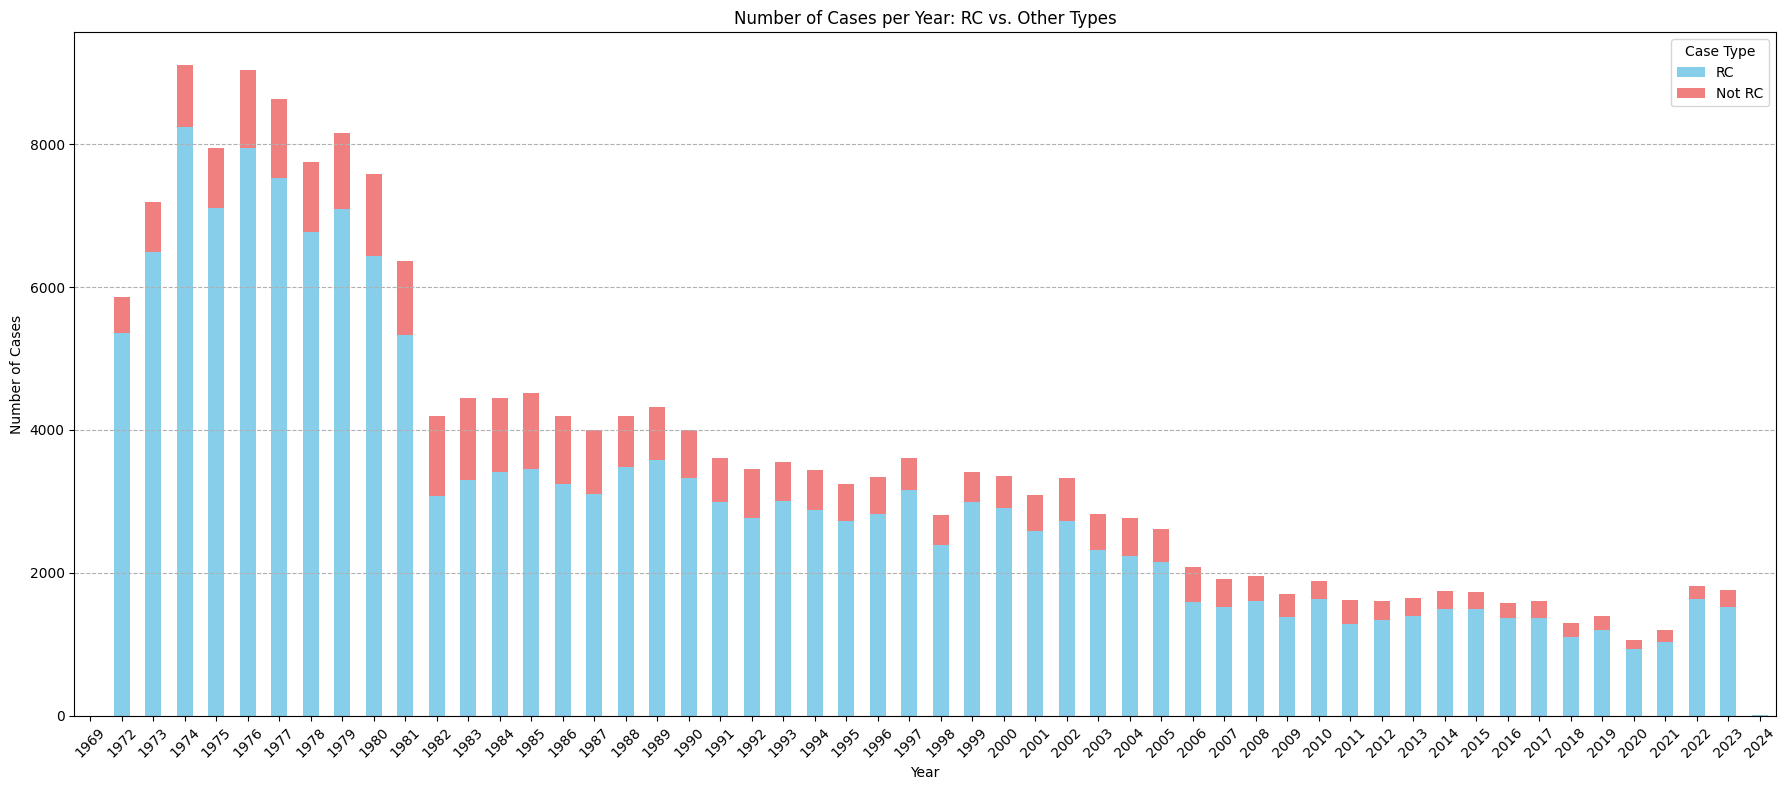

In [173]:
plot_cases_by_type(df_cleaned, 'RC')

In [170]:
plt.rcParams['figure.figsize'] = (18, 8)

In [164]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']


<Figure size 1200x800 with 0 Axes>

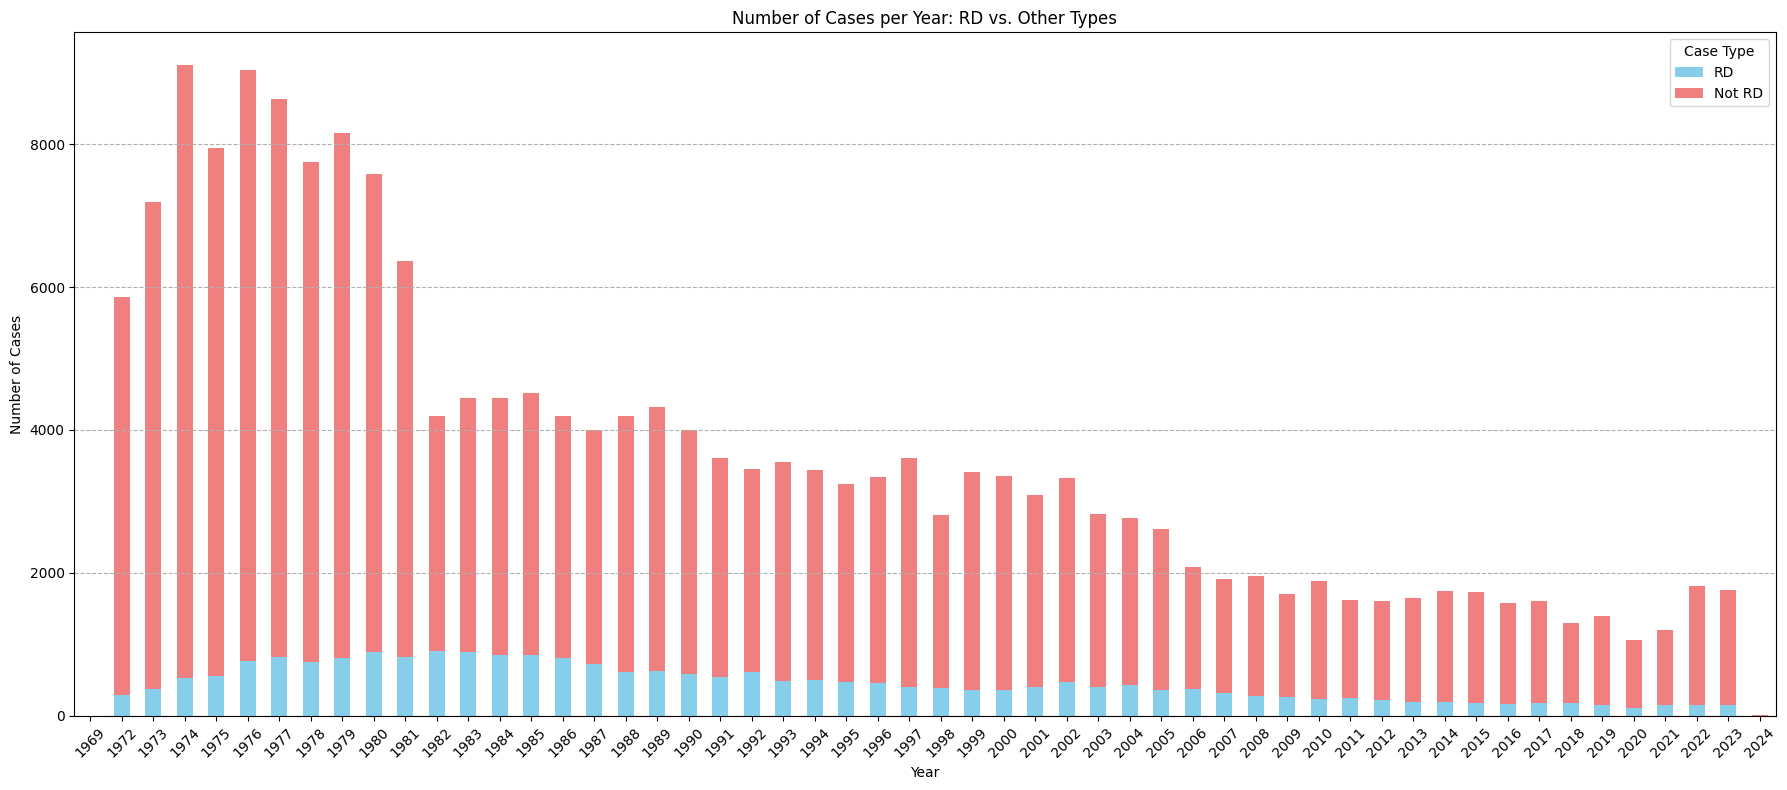

In [172]:
plot_cases_by_type(df_cleaned, 'RD')

## Download Data Set

In [166]:
#find duplicate rows across specific columns
duplicateRows = df_cleaned[df_cleaned.duplicated(['case_number'])]

In [167]:
duplicateRows

,data_source,case_number,type,union,new_date_filed,new_date_election,new_date_closed,election_results_final,employer,petitioner,mean_union_representation,Days_Filed_to_Closed,Days_Filed_to_Election


In [168]:
# df_cleaned.to_pickle('election_all.pkl')

# Convert to Stata

In [169]:
# Convert Unsupported Columns to String
for col in concatenated_df.columns:
    if concatenated_df[col].dtype == 'object':
        # Convert columns with mixed types or unsupported object types to string
        concatenated_df[col] = concatenated_df[col].astype(str)
    elif concatenated_df[col].isnull().all():
        # If a column is entirely null, fill it with a placeholder or drop it
        # For example, filling with an empty string
        concatenated_df[col] = concatenated_df[col].fillna('')


NameError: name 'concatenated_df' is not defined

In [ ]:
# Replace inf and -inf with NaN in the 'union_representation' column
concatenated_df['union_representation'].replace([np.inf, -np.inf], np.nan, inplace=True)


KeyError: 'union_representation'

In [ ]:
# Extracting the middle part (two letters)
# - ([A-Z]{2}) captures exactly two letters (A to Z)
concatenated_df['type'] = concatenated_df['case_number'].str.extract('-(\w{2})-')

In [ ]:
# concatenated_df.to_stata('elections_concatenated.dta', version=118)
